# Introduction

Classification is the job of predicting nominal-valued attribute (class label) based on the values of other attributes (known as predictor variables). In this lab, we provide an example of the use of DT. We use scikit learn library package 

In [1]:
import pandas as pd
#!conda install graphiz
#!pip install pydotplus

In [2]:
data = pd.read_csv("vertebrate.csv", header='infer')

In [3]:
data

,Name,Warm-blooded,Birth,Aquatic-Creature,Aerial-Creature,Has-Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [4]:
data['Class'] = data['Class'].replace(['fishes', "birds", "amphibians", "reptiles"], 'non-mammals')

In [5]:
data

,Name,Warm-blooded,Birth,Aquatic-Creature,Aerial-Creature,Has-Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


Pandas cross tabulation can be used to show the relationship between warm blooded and gives birth

In [6]:
pd.crosstab([data['Warm-blooded'], data['Birth']], data['Class'])

Class               mammals  non-mammals
Warm-blooded Birth                      
0            0            0            7
             1            0            1
1            0            0            2
             1            5            0

#  Bulding the DT classifier

In [7]:
from sklearn import tree

In [8]:
y = data['Class']

In [9]:
y

0         mammals
1     non-mammals
2     non-mammals
3         mammals
4     non-mammals
5     non-mammals
6         mammals
7     non-mammals
8         mammals
9     non-mammals
10    non-mammals
11    non-mammals
12        mammals
13    non-mammals
14    non-mammals
Name: Class, dtype: object

In [10]:
X = data.drop(['Name', 'Class'], axis=1)

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
type(y)

pandas.core.series.Series

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
clf=clf.fit(X, y)

In [16]:
# Ploting the results of the tree

In [17]:
import pydotplus

In [18]:
from IPython.display import Image

In [19]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals', 'non-mammals'], filled=True, out_file=None)

In [20]:
graph = pydotplus.graph_from_dot_data(dot_data)

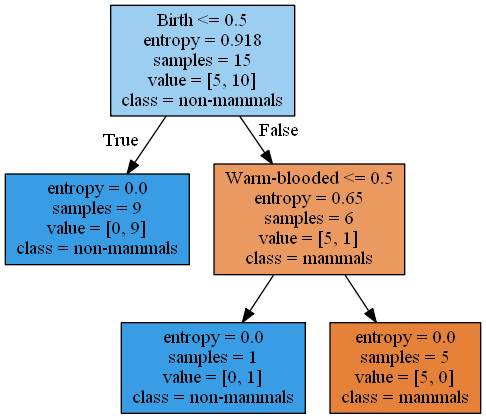

In [21]:
Image(graph.create_png())

## Using the decision tree to classify new datasets

In [36]:
testData = [['gila monster',0, 0, 0, 0, 1, 1, 'non-mammals'],['platypus',1, 0, 0, 0, 1, 1, 'mammals'], ['owl', 1,0,0,1,1,0, 'non-mammals'], ['dolphin', 1, 1, 1,0, 0, 0, 'mammals']]

In [37]:
testData

[['gila monster', 0, 0, 0, 0, 1, 1, 'non-mammals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

In [38]:
test_data = pd.DataFrame(testData, columns= data.columns)

In [39]:
test_data

,Name,Warm-blooded,Birth,Aquatic-Creature,Aerial-Creature,Has-Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [40]:
testY = test_data['Class']

In [41]:
testY

0    non-mammals
1        mammals
2    non-mammals
3        mammals
Name: Class, dtype: object

In [42]:
testX = test_data.drop(['Name', 'Class'], axis=1)

In [43]:
testX

,Warm-blooded,Birth,Aquatic-Creature,Aerial-Creature,Has-Legs,Hibernates
0,0,0,0,0,1,1
1,1,0,0,0,1,1
2,1,0,0,1,1,0
3,1,1,1,0,0,0


In [44]:
predY = clf.predict(testX)

In [45]:
predY

array(['non-mammals', 'non-mammals', 'non-mammals', 'mammals'],
      dtype=object)

In [46]:
3/4 * 100

75.0

In [47]:
predictions = pd.concat([test_data['Name'],test_data['Class'], pd.Series(predY, name='Predicted_Class')], axis=1)

In [48]:
predictions

,Name,Class,Predicted_Class
0,gila monster,non-mammals,non-mammals
1,platypus,mammals,non-mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


In [49]:
from sklearn.metrics import accuracy_score

In [51]:
print('Accuracy on test data is %.2f'%(accuracy_score(testY, predY) * 100.))

Accuracy on test data is 75.00
